## Regression

### Data

A table containing data on the bar takings(in dollars) for different friday nights of june and July as well as the temperature. 

==> Columns: Day, Takings($) (i.e, amount of money that the bar made on that friday night) and Temperature (degree celsius) - the temperature recorded on those days.

**Hypothesis** : The greater the temperature, the more people will likely to go the pub after they finish on a friday.
Always remember to state/define one if you are to carry out a regression analysis. E.g, does the country's lattitude affect their medal tally?


**Aims of regression**
- Generate a relationship between two variables (or the variables involved) and,
- Assess the strength of the relationship

**Uses of regression**
Regression can be used be used for two purposes:
- Predictive purposes
- Causative interpretations


Regression is like trying to draw a line of best fit (called Y hat). Y hat is an estimate or prediction for y given a value of x.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm

In [13]:
df = pd.read_csv('Data/dataset.csv')
df

,day,takings,temp
0,3-Jun,3123,23
1,10-Jun,2089,21
2,17-Jun,2253,25
3,24-Jun,1801,28
4,1-Jul,801,13
5,8-Jul,1934,16
6,15-Jul,1720,13
7,22-Jul,1514,17
8,29-Jul,1017,12


C:\Users\USER\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                takings   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     5.156
Date:                Thu, 30 May 2024   Prob (F-statistic):             0.0574
Time:                        15:33:02   Log-Likelihood:                -68.524
No. Observations:                   9   AIC:                             141.0
Df Residuals:                       7   BIC:                             141.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        371.9473    658.105      0.565      0.5

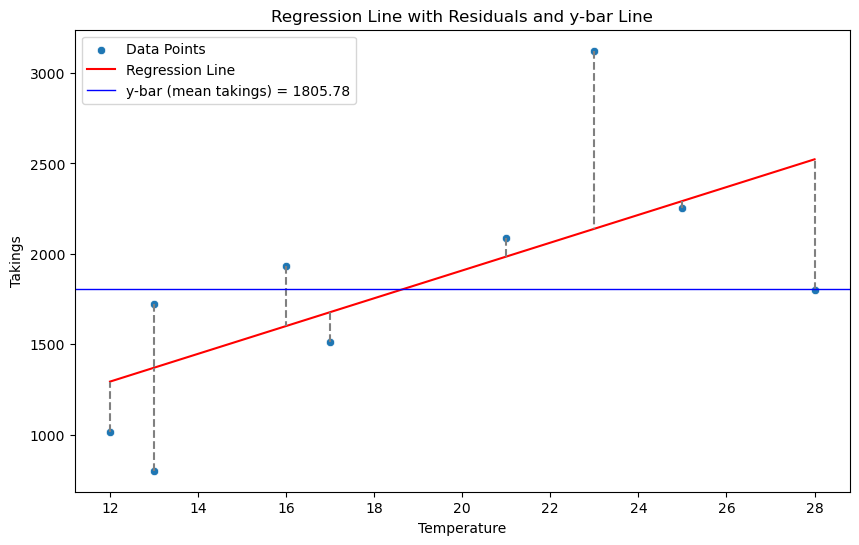

In [14]:
X = df[['temp']]     ##independent variable
Y = df[['takings']]  ##dependent variable

# Add a constant to the independent variable matrix
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Print the model summary
print(model.summary())

# Predictions
df['predicted_takings'] = model.predict(X)

# Calculate residuals
df['residuals'] = df['takings'] - df['predicted_takings']

print(df)

# Calculate the mean of takings (y-bar line)
y_bar = df['takings'].mean()

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='takings', data=df, label='Data Points')
sns.lineplot(x='temp', y='predicted_takings', data=df, color='red', label='Regression Line')

# Plot residuals
for i in range(len(df)):
    plt.plot([df['temp'][i], df['temp'][i]], [df['takings'][i], df['predicted_takings'][i]], color='gray', linestyle='--')

# Add y-bar line
plt.axhline(y=y_bar, color='blue', linestyle='-', linewidth=1, label=f'y-bar (mean takings) = {y_bar:.2f}')

plt.xlabel('Temperature')
plt.ylabel('Takings')
plt.title('Regression Line with Residuals and y-bar Line')
plt.legend()
plt.show()

The regression equation is given as:

`Y hat = 371.9473 + 76.8123X`

**Where coeffiecient of X(aka gradient = 76.8123) and the constant = 371.9473**

How are these numbers obtained?

The distances between the individual points and the line of best fit is known as `error terms.` When it is summed, we have 0 and will not help us find the line of best fit. This is because the line of best fit needs to be drawn at a place where the error terms will be most minimized.

To solve this problem, we have to square these distances to get rid of the negativity. Therefore the sum of the sqauared errors > 0. Now this is the metric we are trying to minimize to create Y hat.


So , `Y hat can be defined as the line that minimizes the sum of the squared errors. So that means there is only one line that can be drawn that can do that.`


The horizontal line is known as the `y-bar line`, i.e the average bar takings, in this case $1,805.9. What regression is all about is trying to figure out why a particular variable is varies, why is this variable high, why did we have this 3200 takings on this day and had 800 on another day. You can access the deviations using y-bar, to see how far the takings are from the mean

**Let us consider the highest point where we had takings to be 3123 on the 23 degree celsius day.**

We can assess the deviations from y bar to the particular observation at the top. We see that it is much higher than the average. The question now is why is that higher than the average. We can seperate the distance to the y bar line using `explained deviations and unexplained deviations`

From the predicted line for the temperature at 23 degrees, we have X which is our expected value or takings for days we have that temperature which from the plot shows us that the takings for that particluar day iof 23 degrees celsius is supposed to be higher than the average takings (Y bar).

Therefore the `distance of the X(predicted/expected value) from the Y-bar is the expected deviation from the mean`. The fact that we know it was a particularly hot day for winter that is, means that on that particular day we expect it to be higher than the mean and expect it to be that much higher than the mean. This is the `explained deviation` from the mean.

It is given as `Y hat - Ybar = explained deviation`.

Despite the fact that we expected it to be higher than the average, it was even higher which resulted in an `unexpected/unexplained deviation` from the mean. So out of the total deviation from the mean, there is an explained and unexplained component. This is where we start dealing with things like SSR, SSE and SST.


### Sum of Squares due to Regression (SSR)
If you sum up the explained components you get SSR.

It measures the variance **explained by the regression model**. It is calculated as the sum of the squared differences between the predicted values and the mean of the observed values.


$$\text{SSR} = \sum_{i=1}^{n} (\hat{y}_i - \bar{y})^2$$

where:
- hat y_i is the i-th predicted value by the regression model.
- bar y is the mean of the observed values.
- n is the number of observations.


### Sum of Squares due to Error (SSE)
If you **sum up all the residuals (AKA errors or unexplained components)**, you will have SSE.

Measures the variance not explained by the regression model. It is calculated as the sum of the squared differences between each observed value and the corresponding predicted value.

$$\text{SSE} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

where:
- y_i is the i-th observed value of the dependent variable.
- hat y_i is the i-th predicted value by the regression model.
- n is the number of observations.



### Total Sum of Squares (SST)
If you were to **sum up the total variations squared**, you will get SST

This is the total variance in the dependent variable. It is calculated as the sum of the squared differences between each observed value and the mean of the observed values.

$$ \text{SST} = \sum_{i=1}^{n} (y_i - \bar{y})^2 $$

where:
- y_i is the (i)-th observed value of the dependent variable.
- y bar is the mean of the observed values.
- n is the number of observations.


## R2

It is the **proportion of the total variation which is being explained. That is, it is the proportion of the total sum of squares being taken out by SSR.** In other words it is the proportion of the variation in Y being explained by the variation in X.

$$ \ R^2 = SSR/SST\ $$

1. When the observations are scattered quite randomly, we have a high SSE (a lot of unexplained deviations because the values are far away from the y bar (average y)) ==> **Low R2** 

2. When the observations are closer together, we have a low SSE (because the value are close to the ybar) ==> **High R2** because SSR is pretty much the entirety of the total sum of squares

As R2 decreases or tends to 0, it means the relationship is becoming weaker.

`For example:`

**Example 1**

$$ SSE = 2$$ 
$$ SSR = 8$$ 
$$ SST = SSE + SSR = 10$$ 

$$ R^2 = 8/10 = 0.8$$ 


**Example 2**

$$ SSE = 8$$
$$ SSR = 2$$ 
$$ SST = SSE + SSR = 10$$ 

$$ R^2 = 2/10 = 0.2$$ 

**R2 gives us some indication of the fit of that model.**

## Clearing some confusion about what lowercase - e and upper case curly E means.

First acknowledge that from the initial sample we took (the friday nights in June and July) **the line of best fit we drew is an estimate of the true relationship** between the bar takings and temperature. So if we took nine new observations (the next 9 fridays) at the pub, we are going to get a different regression line as can be seen below.

`Y hat = 512.4604 + 68.0934X`

The constant as well as the slope changed. What both these equations for the samples are trying to do is to estimate the true effect of temperature on bar takings so it underpins regression itself this assumption that there is a true relationship that we can estimate. And this is given by this equation.

$$Y = \beta_0 + \beta_1 X_1 + \epsilon$$

**Known as the population regression function**. The idea is that we can never know what beta 0 and beta 1 is, but we can estimate them. Therefore in the above beta_0 = 512.4604 and beta_1 = 68.0934, which is just an estimate of the true relationship.

**epsilon** means that every observation has some sort of theoretical distance to that population regression function. We can never calulate that term, but it does exists in theory. This is different from the `error term, lowercase e` which is the distance between our observed data and the regression line, plus this is actually calculated.

In [7]:
df = pd.read_csv('Data/dataset2.csv')
df

,day,takings,temp
0,5-Aug,1602,14
1,12-Aug,1688,16
2,19-Aug,2017,19
3,26-Aug,1000,13
4,2-Sep,1609,20
5,9-Sep,1880,22
6,16-Sep,997,15
7,23-Sep,2366,15
8,30-Sep,2280,25


C:\Users\USER\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                takings   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     3.293
Date:                Wed, 29 May 2024   Prob (F-statistic):              0.112
Time:                        13:35:06   Log-Likelihood:                -66.236
No. Observations:                   9   AIC:                             136.5
Df Residuals:                       7   BIC:                             136.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        512.4604    678.282      0.756      0.4

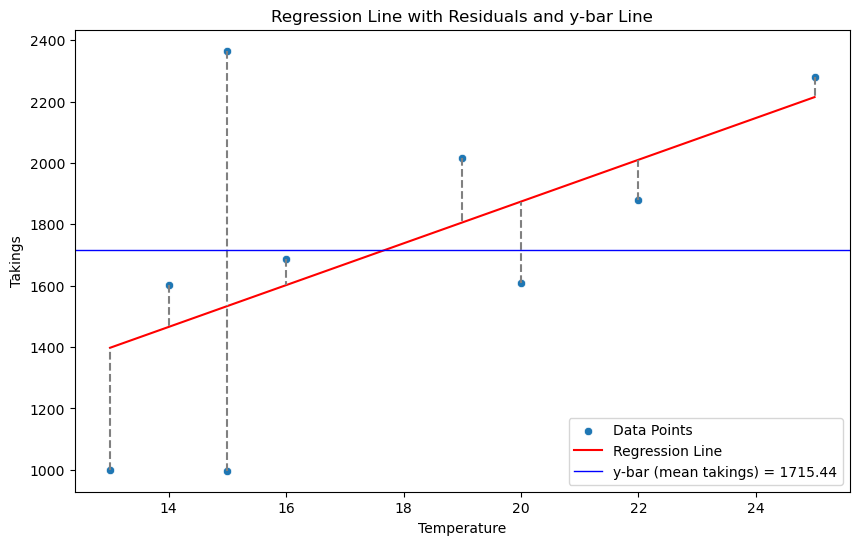

In [8]:
X = df[['temp']]
Y = df[['takings']]

# Add a constant to the independent variable matrix
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Print the model summary
print(model.summary())

# Predictions
df['predicted_takings'] = model.predict(X)

# Calculate residuals
df['residuals'] = df['takings'] - df['predicted_takings']

# Calculate the mean of takings (y-bar line)
y_bar = df['takings'].mean()

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='takings', data=df, label='Data Points')
sns.lineplot(x='temp', y='predicted_takings', data=df, color='red', label='Regression Line')

# Plot residuals
for i in range(len(df)):
    plt.plot([df['temp'][i], df['temp'][i]], [df['takings'][i], df['predicted_takings'][i]], color='gray', linestyle='--')

# Add y-bar line
plt.axhline(y=y_bar, color='blue', linestyle='-', linewidth=1, label=f'y-bar (mean takings) = {y_bar:.2f}')

plt.xlabel('Temperature')
plt.ylabel('Takings')
plt.title('Regression Line with Residuals and y-bar Line')
plt.legend()
plt.show()

## Degrees of freedom

$$Y = \beta_0 + \beta_1 X_1 + \epsilon_i$$

$$df = n-1$$

The above equation shows one dependent and independent variable.

**Question:**

What is the min number of observations required to estimate this regression? Say we are trying to estimate the height of an individual based on weight.

Think about this, if you have one point on the graph, you cannot hope to draw a regression line with just that one. When you have two points on the graph, no matter where these points are positioned on the graph, there would always be a regression line drawn through these two points perfectly (R2 =1), the strength of the relationship between Y and X just cannot be assessed so its not really a regression at all. When we introduce a third point, the model gains some freedom to assess the strength of the relationship between X and Y. Here, we now have df = 1 which allows the model to differ from the points itself. When we add another data point we have df = 2. 

$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \epsilon_i$$


**Question:**

What is the min number of observations required to estimate this regression? Say Y is the height, X1 = weight, X2 = mother's height.

When you have more than one independent variables, we are basically trying to draw a plane of best fit. Therefore, if we have 3 data points present in this three dimensional space, we can have a plane that goes through all of them. When we introduce a 4th observation, the model has more freedom, df =1.

**With the additional variable X2 we have lost some degrees of freedom** for a given number of observations.

$$df = n-k-1$$

n = number of observations

k = the number of explanatory (x) variables, as K increases for a given n.


### What does it do for us?

It is closely related to R2. As the df decreases, (i.e, more variables added to a given model, R2 will only increase). So this means if you're throwing in useless (or of little effect)variables into your model,R2 will keep increasing, not because you are adding any more explanatory power to the model but because you are reducing the degrees of freedom.


## Adjusted R2


$$Adjusted R^2 = 1 - (1 - R^2) \frac{n-1}{n-k-1}$$

Here as k increases, adjusted R2 decreases holding everything else constant. What the adjusted R2 is doing is basically accounting for the reduced power in the model. If you're adding more useful variables to the model, adjusted R2 would also increase but if you add useless variables, adjusted R2 decreases to reflect the fact that you have lost degrees of freedom.

**P.S. Adjusted R2 is not bounded by 0 and 1, we can also get negative values. It is not intuitive enough to say we have 0.05% or something, rather it simply provides us a way to compare several models to find the best fit.**


## Understanding the regression output

Keep in mind that no matter what statsitical package you use, there will be a regression function, but they might be slight differences.

**The population regression formaula is given as:**

$$takings = \beta_0 + \beta_1 (temperature) + \epsilon_i$$

beta_1 = represents the actual effect of temperature on medals. If it is positive, then as temperature increases, takings will increase, if it is negative then as temperature decreases, takings will decrease. If however it is 0, it means there is no impact on the takings. So what we do in regression is to assess beta1 to know if there is a non-zero relationship.

- We can never know the true slope (beta_1)
- Instead we calulate the sample slope(b1) and make inferences about beta_1. That is, from our sample, we can infer that the true effect is positive or not.


**Let's say we have:**

`The gradient of a sample` = 0.8

`Estimated gradient of population, b` = 0.8, but can we be so sure?

We can construct a confidence interval: 0.65 < beta < 0.95.

This confidence interval excludes 0 meaning that we can infer at the 95% confidence level that the population slope is positive so that there is a positive effect of temperature on takings.

**Again, lets say we have:**

`The gradient of a sample` = 0.2

`Estimated gradient of population, b` = 0.2, this is a shallower
confidence interval: -0.5 < beta < 0.8

Here, the confidence interval includes 0 and is a lot wider. This means that we cannot exclude the fact that beta could be negative.

## What is significance?

1. Start with a hypothesis that the gradient is 0 (i.e there is no relationship)

$$ H_0: \beta_1 = 0$$


2. Use a sample to see if there is enough evidence to reject this null hypothesis.
If so, we can infer:

$$ H_1: \beta_1 {!=} 0 $$

That is, we infer that the variable is significant. This means that if the coefficient is non-zero, then the relationship between temperature and takings is significant.

**To reject a null hypothesis means that we are saying that our intial assumption does not hold water.**

In [15]:
df = pd.read_csv('Data/dataset3.csv')
df

,day,takings,temp,num_drinks_available,num_people_at_pub
0,5-Aug,1602,14,400,10
1,12-Aug,1688,16,300,20
2,19-Aug,2017,19,230,30
3,26-Aug,1000,13,98,40
4,2-Sep,1609,20,1234,25
5,9-Sep,1880,22,432,31
6,16-Sep,997,15,120,21
7,23-Sep,2366,15,982,12
8,30-Sep,2280,25,390,9


In [16]:
X = df[['temp', 'num_drinks_available', 'num_people_at_pub']]
Y = df[['takings']]

formula = 'takings ~ temp + num_drinks_available + num_people_at_pub'

# Fit the regression model
model = sm.formula.ols(formula, data=df).fit()

# Print the model summary
print('\n MODEL SUMMARY \n', model.summary())

#performing ANOVA on the fitted model
anova_results = sm.stats.anova_lm(model)

print('\n ANOVA RESULTS \n', anova_results)


 MODEL SUMMARY 
                             OLS Regression Results                            
Dep. Variable:                takings   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     2.104
Date:                Thu, 30 May 2024   Prob (F-statistic):              0.218
Time:                        15:33:33   Log-Likelihood:                -64.297
No. Observations:                   9   AIC:                             136.6
Df Residuals:                       5   BIC:                             137.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept     

C:\Users\USER\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [43]:
sum_squares_model = 612046.485690 + 202741.086539 + 252713.556723
print('sum_squares_model:', sum_squares_model)

sum_squares_residual = 845435.093269

total = sum_squares_model + sum_squares_residual
print('total:', total)

R2 = sum_squares_model/total
print('R2:', R2)

ms_model = 612046.485690 + 202741.086539 + 252713.556723

ms_residual = 169087.018654


F = ms_model/ms_residual

print('F:', F)

sum_squares_model: 1067501.128952
total: 1912936.2222210001
R2: 0.5580432408314094
F: 6.313323976315473


**For this we have:**

The amount of takings in that day AND temp, num_drinks_available, num_people_at_pub

$$ amount of takings = \ b_0 + \ b_1 (temperature) + \ b_2 (num of drinks available) +  \ b_3 (num of people at pub)$$

**Note that**
temp, num_drinks_available, num_people_at_pub make up the model, so we can add the values in the ANOVA results to get the value for the model.


In the ANOVA section, we ask:

`1. How much variation is there in the dependent variable`

We calculate the sum of squares here. It is given as each obeservation minus the mean then square. It is an analogy for how spread out this dataset is

$$
SS = \sum_{i=1}^{n} (X_i - \bar{X}_i)^2
$$

When you sum the values under the sum_sq column you get the Sum of Squares which represents the **amount of variation in our Y variable**.

`2. How much explaining is the model doing?`

This means out of the total sum of squares - 1,912,936.22, we see that the model explains 1,067,501.12 and has a residual of 845,435.09

$$R^2 = \frac{1,067,501.12}{1,912,936.22} = 0.558 $$

This means that 55.8% of the variation in Y was explained by the model (that is our X variables) while residual (unexplained) takes about 45%. So we can say that temperature, num of drinks, num of people at the pub explains 55% of the variation in the total takings each day.

We have the number of df = 3 for our model 
and df = 5 for our residual, this brings the total df = 8. Where df = n-1.

The mean_sq is the sum of squares divided by the degrees of freedom

$$MS = \frac {SS}{df}$$


`3. Is this model with 3 explanatory variables better than a model with 0 explanatory variables?`

The essence of using the mean squares is so that it tells us whether this particular hypothesis test below will be rejected or not.

$$ H_0: \beta_1 = \beta_2 = \beta_3 = 0$$

What the above equation means is that if all three coefficients are jointly = 0, it means that our regression is absolutely useless.If we cannot reject this, it means our model is useless. Can we reject this? Let's have a look. This is done by constructing an F-statistic.

**F-statistic**
This states the overall significance of the model.

$$F_{3,5} = \frac {MS_{model}}{MS_{residual}} = 2.104$$

This (The F-statistic) allows us to reject the null hypothesis at the 5% level of significance.

Back to our question as stated earlier:

**Prob(F-statistic)**
This shows the P-value associated with the F-statistic. A very low value indicates the model is statistically significant.

From the table we see: Prob (F-statistic) = 0.218 . This is the p-value.

Rememebr that if the **p-value < level of significance = you can reject the null hypothesis.**

So lets say we use level of significance = 5% = 0.05. This becomes:

0.218 > 0.05. That means we need to accept the null hypothesis. This means that there is not enough information that any of those coefficients are different from 0.



### Second section of the Model summary -- checking the effect of the individual variables
The ANOVA section tells us whether any of the variables are significant at all.

This second section of the model goes into more details about the variables in our model

**1. coef: These are the estimated coefficients that will be used in the population regression equation**

$$amount of takings = 970.7599 + 56.3166({temperature_i}) + 0.2923({num of drinks available_i}) -17.5550({num of people at pub_i})$$

This can be intepreted as: 

For every additional temperature, the expected amount made at the pub on a friday night increases by 56.3166 on average holding all the other variables constant.

For every additional number of drink available, the expected amount made at the pub on a friday night increases by 0.2923 on average holding all the other variables constant.

For every reduction in the number of people at the pub, the expected amount made at the pub on a friday night decreases by 17.5550 on average holding all the other variables constant.

We can use this to predict the amount that would be made on any friday night. On this friday night we have:

`temperature = 27, num of drinks available = 100, number of people at the pub = 10.`

These values can be imputed into the equation above to get the prediction.

**2. std err**

Let's say our prediction resulted in $2000 takings that night.

When we checked the actual values for our table, we saw it was way above that at 2500. This means that we have an error of 2500-2000 = +500. `This is the standard error`. It gives you some expected average error term.

**3. t-statistic**

Next, we can divide the `coefficient by the standard error to get the t-statistic` which is a standardized value. The t-statsitic is a standardised coefficient value. **The higher (based on magnitude) the t-statistic, the more significant the variable is**. The negative/positive sign tells us whether it is positively or negatively related. From the table, we can say that the temperature is the most significant followed by num_drinks_available then num_people_pub.

**4. P>|t|**

This is known as the p-value for the t-statistic. Values below 0.05 typically indicate that the coefficient is significantly different from 0.

`P>|t| -- the values calculated here are two tailed`

The p-value gives you the probability that of this coefficient occurring just due to random chance asin there is no effect of temperature for instance on the takings, however our sample just happened to be a freak sample and we got that coefficient value for the temperature.

**5. [0.025, 0.975]:**

This shows the range of values we can expect for each coefficient. It is the 95% confidence interval for the coefficient estimates.

### Diagnostic tests

1. `Omnibus`: a test of the combined skewness and kurtosis. A small value suggests normality of residues

2. `Prob(Omnibus)`: The p-value for the Omnibus test

3. `Jarque-Bera(JB)`: a test for normality. A small value suggests normality

4. `Prob(JB)`: the p-value for the Jarque-Bera test

5. `Skew`: measures the asymmetry of the residual distribution

6. `Kurtosis`: measures the peakedness of the residual distribution

7. `Durbin-Watson`: tests for autocorrelation in the residuals. Values close to 2 suggest no autocorrelation

8. `Cond. No.`: the condition number which indicates multicollinearity. Values above 30 suggest possible multicollinearity problems. 

## Non linear relationships and logarithms


In [20]:
df = pd.read_csv('Data/jaybob.csv')
df.head()

,Car ID,Price,Odometer,Age,Pink slip,Sold?
0,1,"$1,000",30.298,28,1,1
1,2,"$9,000",19.647,40,1,0
2,3,$500,170.270,58,0,1
3,4,"$3,000",68.394,12,1,1
4,5,"$9,500",11.662,3,0,0


- `Price` - advertised sale price in Australia dollars
- `Age` - model age in years
- `Odometer` - odometer reading ('000 kms)
- `Pink slip` - presence of Road Worthiness Certificate (1=yes, 0=no) - this is a categorical column even though it is being represented in numbers.
- `Sold` - whether car sold (1=yes, 0=no)

### Model 1

$$Price = \beta_0 + \beta_1 (Age) +  \beta_2 (Odometer) + \epsilon_i$$

In [23]:
df.columns = df.columns.str.strip()

df['Price'] = df['Price'].str.replace('$', '').str.replace(',', '')
df['Price'] = pd.to_numeric(df['Price'])

C:\Users\USER\AppData\Local\Temp\ipykernel_8500\2788273300.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$', '').str.replace(',', '')


In [25]:
X = df[['Age', 'Odometer']]
Y = df[['Price']]

X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     9.980
Date:                Thu, 30 May 2024   Prob (F-statistic):           0.000114
Time:                        15:37:58   Log-Likelihood:                -985.48
No. Observations:                 100   AIC:                             1977.
Df Residuals:                      97   BIC:                             1985.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4615.9004    792.153      5.827      0.0

$$Price = 4615.9 + 98.9 (Age) -23.0 (Odometer)$$

R2 = 0.171

**Interpretation:**

**For every additional year in age, the car can be expected to increase in price by $98.92 on average, holding odometer constant.**

**For every additional thousand km on the odometer, the price is expected to  decrease by $23.0 on average, holding age constant.**

Something is off, we already assumed from the get go that there is a linear relationship between the variables. Check the scatter plots.

<AxesSubplot:xlabel='Odometer', ylabel='Price'>

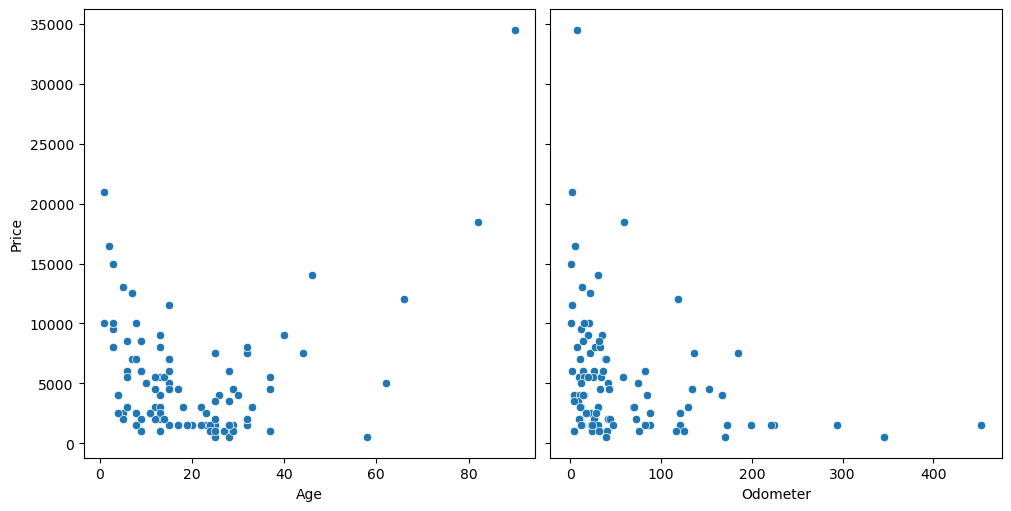

In [26]:
fig, axs = plt.subplots(1,2, figsize=(10,5), layout = 'constrained', sharey = True)

sns.scatterplot(data=df, x='Age', y='Price', ax=axs[0])
sns.scatterplot(data=df, x='Odometer', y='Price', ax=axs[1])

### Model 2

We can see from the scatter plot that there is no linear relationship and the model is trying to fit a line through the points.

Let's take the reciprocal value of the Odometer.

$$Price = \beta_0 + \beta_1 (Age) + \beta_2 (Age)^2 + \beta_3 \frac {1}{Odometer} + \epsilon_i$$

This is still a linear regression with a quadratic representation. The term linear regression refers to the coefficients themselves.

In [29]:
df['Age2'] = df['Age']**2
df['1/Odometer'] = 1/df['Odometer']

df.head()

,Car ID,Price,Odometer,Age,Pink slip,Sold?,Age2,1/Odometer
0,1,1000,30.298,28,1,1,784,0.033005
1,2,9000,19.647,40,1,0,1600,0.050898
2,3,500,170.270,58,0,1,3364,0.005873
3,4,3000,68.394,12,1,1,144,0.014621
4,5,9500,11.662,3,0,0,9,0.085749


In [30]:
X = df[['Age', 'Age2', '1/Odometer']]
Y = df[['Price']]

X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     45.13
Date:                Thu, 30 May 2024   Prob (F-statistic):           2.78e-18
Time:                        15:55:26   Log-Likelihood:                -950.85
No. Observations:                 100   AIC:                             1910.
Df Residuals:                      96   BIC:                             1920.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8809.0342    806.828     10.918      0.0

$$Price = 8809.0 -429.6 (Age) + 7.3(Age)^2 + 1946.4 (1/Odometer)$$

R2 = 0.585

Our R2 is better  and our p values shows us the variables are significant. However, looking at the regression equation, we cannot exactly explain the effects of each variable on the Price. The solution to this is to use Logarithm so it leaves the variables more interpretable.

Logarithms are a way of scaling skewed data.

 
| Original scale | Log scale (base 10)                                                                                                                                          |
|--------|----------------------------------------------|
| 10       | Log(10) = 1|
| 100      | Log(100) = 2|
| 10,00    | Log(1000) = 3 |
| 10,000   | Log(10000) = 4|

This means that if you have a very skewed (positively skewed) dataset with a couple of really high values, helps to squish in the extreme values. Most times we don't use log, rather we use `e` which is the natural log.


| Original scale | Log scale (base e)                                                                                                                                          |
|--------|----------------------------------------------|
| 2.78       | Ln(2.78 ) = 1|
| 7.389     | Ln(7.389) = 2|
| 20.086    | Ln(20.086) = 3 |
| 54.598   | Ln(54.598) = 4|

<AxesSubplot:xlabel='Odometer', ylabel='Count'>

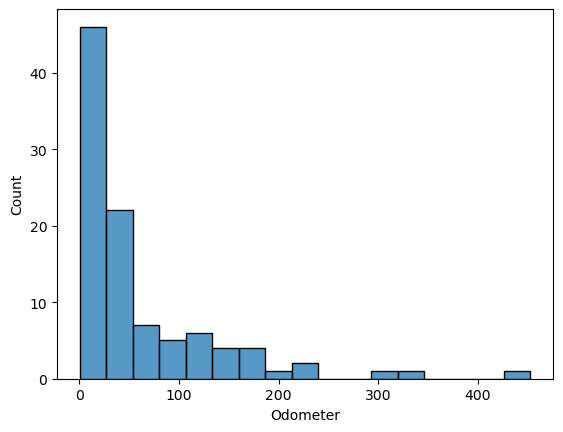

In [31]:
sns.histplot(data = df, x='Odometer')

From this data we can see that the Odometer values are positively skewed. One thing with regression modeling we usually like imputing variables that are roughly normally distributed, and this variable does not have that. If we were to use this in the model there might some issues.

In [34]:
df['log_odometer'] = np.log(df['Odometer'])
df.head()

,Car ID,Price,Odometer,Age,Pink slip,Sold?,Age2,1/Odometer,log_odometer
0,1,1000,30.298,28,1,1,784,0.033005,3.411082
1,2,9000,19.647,40,1,0,1600,0.050898,2.977925
2,3,500,170.270,58,0,1,3364,0.005873,5.137385
3,4,3000,68.394,12,1,1,144,0.014621,4.225285
4,5,9500,11.662,3,0,0,9,0.085749,2.456336


<AxesSubplot:xlabel='log_odometer', ylabel='Count'>

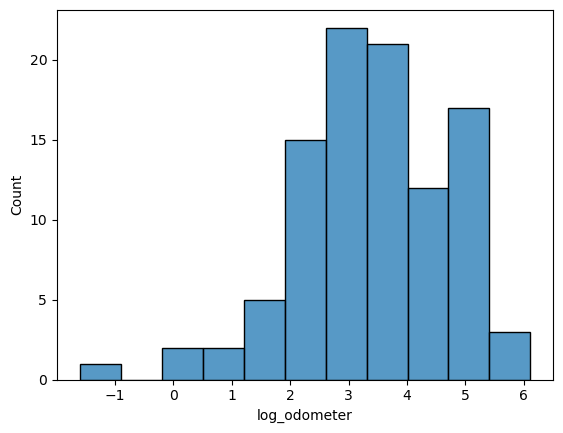

In [35]:
sns.histplot(data = df, x='log_odometer')

### Model 3

$$Price = \beta_0 + \beta_1 (Age) + \beta_2 (Age)^2 + \beta_3 Ln(Odometer) + \epsilon_i$$

In [36]:
X = df[['Age', 'Age2', 'log_odometer']]
Y = df[['Price']]

X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     50.66
Date:                Thu, 30 May 2024   Prob (F-statistic):           1.02e-19
Time:                        16:20:02   Log-Likelihood:                -947.38
No. Observations:                 100   AIC:                             1903.
Df Residuals:                      96   BIC:                             1913.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.186e+04    940.977     12.607   

R2 = 0.613

And our p-values for the variables are really low indicating signifcance for the variables.

$$Price = 11863.1 -365.5(Age) + 6.62 (Age)^2 -1079.4 Ln(Odometer)$$

**To interpret this we can say:**

**A one unit increase in the natural log of the odometer reading decreases the price by $1079.40, on average, holding Age constant. But this interpretation is not helpful in a practical sense.**

**Instead, we say that:**

**A 1% increase in the odometer reading decreases the price by 1079.4/100 = $10.79 on average, holding age constant**

<AxesSubplot:xlabel='Price', ylabel='Count'>

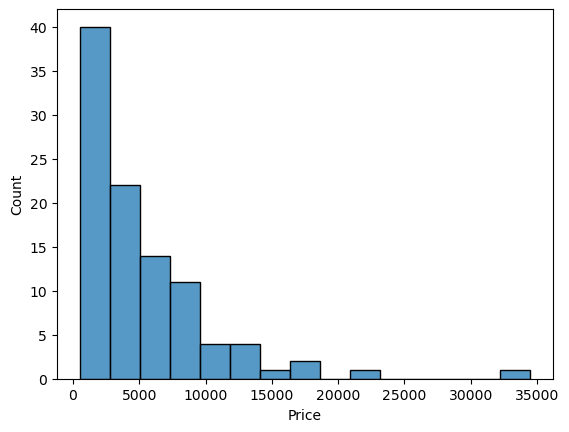

In [37]:
sns.histplot(data = df, x='Price')

Looking at the price variable, it is positively skewed. We can take the log of price as well.

In [38]:
df['log_price'] = np.log(df['Price'])
df.head()


,Car ID,Price,Odometer,Age,Pink slip,Sold?,Age2,1/Odometer,log_odometer,log_price
0,1,1000,30.298,28,1,1,784,0.033005,3.411082,6.907755
1,2,9000,19.647,40,1,0,1600,0.050898,2.977925,9.104980
2,3,500,170.270,58,0,1,3364,0.005873,5.137385,6.214608
3,4,3000,68.394,12,1,1,144,0.014621,4.225285,8.006368
4,5,9500,11.662,3,0,0,9,0.085749,2.456336,9.159047


<AxesSubplot:xlabel='log_price', ylabel='Count'>

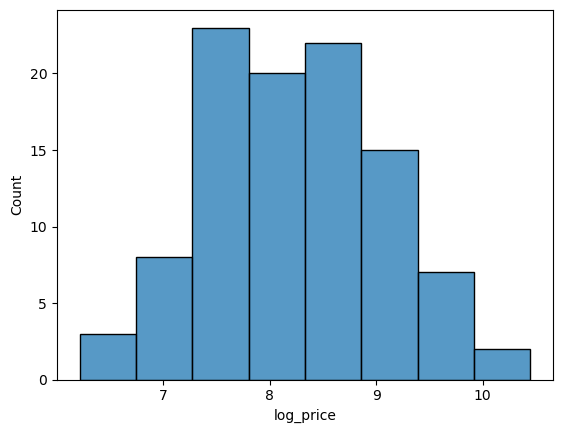

In [39]:
sns.histplot(data = df, x='log_price')

## Model 4

$$Ln(Price) = \beta_0 + \beta_1 (Age) + \beta_2 (Age)^2 + \beta_3 Ln(Odometer) + \epsilon_i$$

In [40]:
X = df[['Age', 'Age2', 'log_odometer']]
Y = df[['log_price']]

X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     18.15
Date:                Thu, 30 May 2024   Prob (F-statistic):           2.09e-09
Time:                        16:34:50   Log-Likelihood:                -107.19
No. Observations:                 100   AIC:                             222.4
Df Residuals:                      96   BIC:                             232.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            9.3916      0.211     44.472   

We can notice that our R2 has reduced as well. We can be tempted to assume that this model isn't as good as the last one.

$$Ln(Price) = 9.39 -0.05 (Age) + 0.001 (Age)^2 - 0.1971Ln(Odometer)$$

**The interpretation becomes:**

**A 1% increase in the odometer reading decreases the price by 0.197% on average, holding age constant.**

## Categorical X variables

When the explanatory variables are categorical.

Binary variables ==> Pink slip

$$Price = \beta_0 + \beta_1 (Pink Slip) + \epsilon_i$$

In [41]:
X = df[['Pink slip']]
Y = df[['Price']]

X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.824
Date:                Thu, 30 May 2024   Prob (F-statistic):              0.180
Time:                        16:43:55   Log-Likelihood:                -993.91
No. Observations:                 100   AIC:                             1992.
Df Residuals:                      98   BIC:                             1997.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3978.2609   1056.292      3.766      0.0

$$Price = 3978.2 + 1625.6 (Pink Slip)$$

Remember that Price here is an estimate.

To interpret the equation above:

A car with a pink slip would command a sale price $1,626 more than a car without a pink slip, on average.

However, our p-value is high, that is > 0.05 which indicates to us that it is not statistically significant.

### Model 5

$$Ln(Price) = \beta_0 + \beta_1 (Age) + \beta_2 (Age)^2 + \beta_3 Ln(Odometer)  + \beta_4 (Pink slip) + \epsilon_i$$

In [42]:
X = df[['Age', 'Age2', 'log_odometer', 'Pink slip']]
Y = df[['log_price']]

X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     13.77
Date:                Thu, 30 May 2024   Prob (F-statistic):           6.82e-09
Time:                        16:49:47   Log-Likelihood:                -106.79
No. Observations:                 100   AIC:                             223.6
Df Residuals:                      95   BIC:                             236.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            9.2371      0.276     33.512   

Again pink slip is not significant in explaining the changes in price. Let's carry on with it for a while.

$$Ln(Price) = 9.23 -0.05 (Age) + 0.001 (Age)^2 - -0.198Ln(Odometer) + 0.156(Pink slip)$$

**The interpretation for the pink slip in this case would be:**

**A car with a pink slip would command a sale price 15.6% higher than a car without a pink slip, on average, holding all other variables constant**


#### What if we have a multi-level categorical variable?

Let's create a new column.

In [43]:
def age_cat(Age):
    if Age<=5:
        return 1
    elif 5< Age <=15:
        return 2
    elif 15 < Age <= 35:
        return 3
    else:
        return 4

df['age_cat'] = df['Age'].apply(age_cat)
df.head()

,Car ID,Price,Odometer,Age,Pink slip,Sold?,Age2,1/Odometer,log_odometer,log_price,age_cat
0,1,1000,30.298,28,1,1,784,0.033005,3.411082,6.907755,3
1,2,9000,19.647,40,1,0,1600,0.050898,2.977925,9.104980,4
2,3,500,170.270,58,0,1,3364,0.005873,5.137385,6.214608,4
3,4,3000,68.394,12,1,1,144,0.014621,4.225285,8.006368,2
4,5,9500,11.662,3,0,0,9,0.085749,2.456336,9.159047,1


There is a problem however. Using this age_cat column does not represent the underlying relationships so instead we create dummy variables.


In [49]:
def age_cat_2(Age):
    if Age<=5:
        return 'age_cat1'
    elif 5< Age <=15:
        return 'age_cat2'
    elif 15 < Age <= 35:
        return 'age_cat3'
    else:
        return 'age_cat4'

df['age_cat_again'] = df['Age'].apply(age_cat_2)

df.head()

,Car ID,Price,Odometer,Age,Pink slip,Sold?,Age2,1/Odometer,log_odometer,log_price,age_cat,age_cat_again
0,1,1000,30.298,28,1,1,784,0.033005,3.411082,6.907755,3,age_cat3
1,2,9000,19.647,40,1,0,1600,0.050898,2.977925,9.104980,4,age_cat4
2,3,500,170.270,58,0,1,3364,0.005873,5.137385,6.214608,4,age_cat4
3,4,3000,68.394,12,1,1,144,0.014621,4.225285,8.006368,2,age_cat2
4,5,9500,11.662,3,0,0,9,0.085749,2.456336,9.159047,1,age_cat1


In [50]:
dummies = pd.get_dummies(df['age_cat_again'])
merged = pd.concat([df, dummies], axis='columns')
merged

,Car ID,Price,Odometer,Age,Pink slip,Sold?,Age2,1/Odometer,log_odometer,log_price,age_cat,age_cat_again,age_cat1,age_cat2,age_cat3,age_cat4
0,1,1000,30.298,28,1,1,784,0.033005,3.411082,6.907755,3,age_cat3,0,0,1,0
1,2,9000,19.647,40,1,0,1600,0.050898,2.977925,9.104980,4,age_cat4,0,0,0,1
2,3,500,170.270,58,0,1,3364,0.005873,5.137385,6.214608,4,age_cat4,0,0,0,1
3,4,3000,68.394,12,1,1,144,0.014621,4.225285,8.006368,2,age_cat2,0,1,0,0
4,5,9500,11.662,3,0,0,9,0.085749,2.456336,9.159047,1,age_cat1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,3000,10.571,33,1,0,1089,0.094598,2.358114,8.006368,3,age_cat3,0,0,1,0
96,97,4500,42.990,12,1,1,144,0.023261,3.760968,8.411833,2,age_cat2,0,1,0,0
97,98,1000,4.021,25,0,0,625,0.248694,1.391531,6.907755,3,age_cat3,0,0,1,0
98,99,10000,14.689,3,1,1,9,0.068078,2.687099,9.210340,1,age_cat1,1,0,0,0


### Model 6

$$Ln(Price) = \beta_0 + \beta_1 (age_cat1) + \beta_2 (age_cat2) + \beta_3 (age_cat3) + \beta_4 (age_cat4) + \beta_5 Ln(Odometer)  + \beta_6 (Pink slip) + \epsilon_i$$

**BUT**, there's a problem - the dummy variable trap which implies that we can't actually include all these variables into our model.

`age_cat1 = 1 - age_cat2 - age_cat3 - age_cat4`

This is because age_cat1 when phrased like the above does not add any new information to our model because it will be hard for the variable to determine if the effect came from other three categories equal 0.

In [51]:
X = merged[['Age', 'Age2', 'log_odometer', 'Pink slip', 'age_cat1', 'age_cat2', 'age_cat3', 'age_cat4']]
Y = merged[['log_price']]

X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     9.899
Date:                Thu, 30 May 2024   Prob (F-statistic):           3.74e-09
Time:                        17:20:20   Log-Likelihood:                -101.57
No. Observations:                 100   AIC:                             219.1
Df Residuals:                      92   BIC:                             240.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.0816      0.420     16.880   

## Model 6

We can drop any of the columns.

However there is a rule such that the category with the highest population should be dropped.

In [52]:
merged.drop(['age_cat1'], inplace=True, axis=1)
merged.head()

,Car ID,Price,Odometer,Age,Pink slip,Sold?,Age2,1/Odometer,log_odometer,log_price,age_cat,age_cat_again,age_cat2,age_cat3,age_cat4
0,1,1000,30.298,28,1,1,784,0.033005,3.411082,6.907755,3,age_cat3,0,1,0
1,2,9000,19.647,40,1,0,1600,0.050898,2.977925,9.104980,4,age_cat4,0,0,1
2,3,500,170.270,58,0,1,3364,0.005873,5.137385,6.214608,4,age_cat4,0,0,1
3,4,3000,68.394,12,1,1,144,0.014621,4.225285,8.006368,2,age_cat2,1,0,0
4,5,9500,11.662,3,0,0,9,0.085749,2.456336,9.159047,1,age_cat1,0,0,0


In [54]:
X = merged[['log_odometer', 'Pink slip', 'age_cat2', 'age_cat3', 'age_cat4']]
Y = merged[['log_price']]

X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     12.12
Date:                Thu, 30 May 2024   Prob (F-statistic):           4.56e-09
Time:                        17:24:24   Log-Likelihood:                -104.77
No. Observations:                 100   AIC:                             221.5
Df Residuals:                      94   BIC:                             237.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            8.9484      0.279     32.038   

$$Ln(Price) = 8.94 -0.1293 (age cat2) - 0.7334 (age cat3) + 0.4736 (age cat4) -0.2246 Ln(Odometer)  + 0.3443 (Pink slip) + \epsilon_i$$

**The interpretation becomes:**

**On average holding all other categories constant, a car in age category 2 will command a price 12.9% lower than a car in age category 1.**

**We can also say that:**

**On average holding all other categories constant, a car in age category 3 will command a price 73.3% lower than a car in age category 1**

OR

**On average holding all other categories constant, a car in age category 4 will command a price 47.4% higher than a car in age category 1.**

**Note that when you change the functional form of one variable, it does impact on other variables as well**

## Interaction terms in regression modeling

**Intuition**

Let's say we want to build a model to explain the salary of all of Google's employees. Let's say we intend to use the employees age and the university degree

$$Salary = \beta_0 + \beta_1 (employee_age) + \beta_2 (uni degree) + \epsilon_i$$

When we create a chart for this we would see that as you get older your uni degree is no longer of much relevance to cause an increase in your salary, rather experience is more valued at that stage and based on this we create a new variable to capture this.

$$Salary = \beta_0 + \beta_1 (employee age) + \beta_2 (uni degree) + \beta_2 (employee age) * (uni degree) +\epsilon_i$$

This third term is referred to as an interaction term.

**Interaction terms are usually required when:**

X1 affects the relationship between X2 and Y (e.g, 'age of the employee' affects the relationship between 'attainment of university dergree' and 'salary'

**Common misconception**
DON'T CONFUSE this with correlation to say that an interaction term is required when X1 and X2 are correlated. THIS IS WRONG. The necessity for an interraction term has nothing to do with correlation.

Therefore we can see it as these terms serve as effect modifiers. In our example, we can say that the employee's age acts as an effect modifier for uni degree on salary.

## Model 7

Applying this to our work at hand.

We can bring in come subject matter knowledge here. For cars in category 4, they are most likely vintage cars people are willing to pay handsomely for. Now imagine we have a vintage car with a pink slip - the road worthiness of this car, it gives the car an extra appeal (effect).

So we need to add that extra term to capture that efect.


$$Ln(Price) = \beta_0 + \beta_1 (age cat2) + \beta_2 (age cat3) + \beta_3 (age cat4) + \beta_4 Ln(Odometer)  + \beta_5 (Pink slip) + \beta_6(Pink slip) * age cat4 + \epsilon_i$$

In [55]:
merged['slip_x_cat4'] = merged['Pink slip'] * merged['age_cat4']
merged.head()

,Car ID,Price,Odometer,Age,Pink slip,Sold?,Age2,1/Odometer,log_odometer,log_price,age_cat,age_cat_again,age_cat2,age_cat3,age_cat4,slip_x_cat4
0,1,1000,30.298,28,1,1,784,0.033005,3.411082,6.907755,3,age_cat3,0,1,0,0
1,2,9000,19.647,40,1,0,1600,0.050898,2.977925,9.104980,4,age_cat4,0,0,1,1
2,3,500,170.270,58,0,1,3364,0.005873,5.137385,6.214608,4,age_cat4,0,0,1,0
3,4,3000,68.394,12,1,1,144,0.014621,4.225285,8.006368,2,age_cat2,1,0,0,0
4,5,9500,11.662,3,0,0,9,0.085749,2.456336,9.159047,1,age_cat1,0,0,0,0


In [56]:
X = merged[['log_odometer', 'Pink slip', 'age_cat2', 'age_cat3', 'age_cat4', 'slip_x_cat4']]
Y = merged[['log_price']]

X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     12.50
Date:                Thu, 30 May 2024   Prob (F-statistic):           2.77e-10
Time:                        17:58:50   Log-Likelihood:                -100.08
No. Observations:                 100   AIC:                             214.2
Df Residuals:                      93   BIC:                             232.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            9.1252      0.274     33.275   

Notice that some of the p-values have changed. The pink slip is insignificant.

$$Ln(Price) = 9.1252 -0.1806 (age cat2) - 0.8003 (age cat3) -0.3902 (age cat4) -0.2095 Ln(Odometer)  + 0.1230 (Pink slip) + 1.3708(Pink slip) * age cat4$$

**Interpretation:**

**To interpret the coefficient of pink slip** we cannot jjust rely on the variable in front of the variables, because pink slip actually exists in two places.


So we can say that for car models less than or equal to 35 years old, attaining a pink slip increaes the price by an average of 12.3% holding all else constant.

Remember that for models not in category 4, the last term `1.3708(Pink slip) * age cat` = 0

...BUT for models older than 35 years, attaining a pink slip increases the price by an average of 149.4%, holding all else constant. How did we get this value?

Remember that if teh car falls in category 4, it means age_cat4 = 1, that makes it ` 1.3708(Pink slip) * age cat4` = ` 137.08%(+ 12.3%) * 1`

**Question:**

Using model 7, find the expected sale price of my 1974 Datsun 120y Coupe with 290,000 on the odometer and a road worthy certificate.

In [20]:
price = 9.125 -0.181*0 - 0.800*0 -0.390*1 -0.209*np.log(290)  + 0.123*1 + 1.371*1* 1
price = round(price, 3)
print(f'Ln(Price): ${price}')

#unlogging the number
price_unlog = np.exp(price)
price_unlog = round(price_unlog)
print(f'Price: ${price_unlog}')

Ln(Price): $9.044
Price: $8468


# Regression Assumptions

The essence of these assumptions are to help us know when to rely on the numbers (output from the model summary) and when not to, because you do not want to be stuck doing regression, analysing it and it been misleading and coming up with a wrong conclusion.

It is important to understand these assumptions to figure out if your regression is violating them.

**1. Linearity**

Your regression needs to be linear in the betas (paramters), i.e you should not have beta_1^2.

**2. Constant error variance (AKA homoskedasticity)**

If we were to map out all the distances(i.e the distances between the data points and the regression line), the variance should be about the same as x increases.

**3. Independent error terms**

This is where each successive error is independent of the last one. When this is violated, it is known as autocorrelation.

**4. Normal errors (or normally distributed errors)**

Not only do the errors have to be constant in their variance, the spread needs to be normally distributed.

**5. No multi-collinearity (or truly independent X terms)**

multi-collinearity occurs when the x variables are themselves related (i.e, they are related to each other)


**6. Exogeneity (ommitted variable bias)**



When we violate these assumptions, one of two things happen:
- Our coefficients become unreliable and then we say they become bias
- The standard errors are unrelaible and any hypothesis testing we are doing on our coefficients in unreliable. 

## Linearity == correct functional form
This speaks to whether or not you have got the right form of your population regression equation.

We use the resdual plot to access this. The plot is supposed to show an evenly spread residues around the horizontally placed regression line.

**What is the issue?**
If the functional form is incorrect, both the coefficients and std errors in your output are unreliable.

**Detection:**
- Residual plots
- Likelihood ratio(LR) tests

**Remedies**
- Get the specification correct (trial and error)

## Constant error variance (AKA homoskedasticity) == no heteroskedacity

$$ \ Expenditure_i = \beta_0 + \beta_1 (Income)_i + \epsilon_i$$

Let's say we want to model household expenditure as a function of income. We know that on average, if your income increases, our expenditure also increases. But, you can also have a high income and choose to spend a lot or not spend so much.

When we plot the residual plot we observe that the error variance (resuidues) is increasing as x is increasing. This is a problem. This is what is known as heteroskedacity. The error variance are supposed to be normally distributed and not skewed.


**What is the issue?**
- Under heteroskedacity std errors in output cannot be relied upon.Here, the coefficient (i.e gradient) is still unbiased and can be relied on but the variance or the hypothesis test we may want to conduct on the gradient will be problematic


**Detection:**
- Goldfeldt-Quant test
- Breusch-Pagan test

**Remedies**
- White's standard errors aka heteroskedacity corrected errors: this accounts for the heteroskedacity and gives us errors that incoporate that.
- Changing the equation a bit by weighting each of the variable - Weighed least squares
- Log the variables
- You can use other transformations as well.

## Independent error terms (no autocorrelation) == serial correlation

Autocorrelation is a violation that can only occur to time series data, so that means there need to be some kind of order to your x-variable

$$ \ Stock index_i = \beta_0 + \beta_1 (Time)_i + \epsilon_i$$

Let's say we are trying to map out a long term trend of some stocks, we can run a regression where the x variable is actually a time variable so each successive value of x relates to the one before it.

So when we go to our scatter plots we couls see a kind of snaky pattern for which we may need to draw a regression for. Our residual plot will surely show some clustering of these residuals, What this means is that each residual is affected by the one before it.


**What is the issue?**
Under correlation, standard errors in the ouput cannot be relied upon even though our coefficients are reliable.


**Detection:**
- Durbin-Watson test: detects correlation of the first order. This means that where the preceeding observation affects the following observation
- Breusch-Godfrey test: checks if there is anyu autocorrelation beyond the first order


**Remedies**
- Investigate omitted variables
- Creating a generalized difference equation (Cochrane-Orchutt or AR(1) methods)



## Normality of error terms

$$ \ Medical Insurance Payout_i = \beta_0 + \beta_1 (Customer Age)_i + \epsilon_i$$

When we look at the scatter plot it can show us a lot of zeros


**What is the issue?**
- If normality is violated and n is small, standard errors in output are affected. 

If you are violating normality it is not often considered as a problem particularly if you have a large number of observations. With a large number of observations, the central limit theorem will apply.


Also, you can better assess if the normality is being violated if you have more data. When you have a small number of observations it becomes more difficult

**Detection:**
- Take a look at the histogram of the residuals or QQ plot
- Shapiro-Wilk
- Komolgorov-Smirnov test
- Anderson-Darling test

**Remedies**
- You can change functional form or log tranformation

## No multicollinearity

$$ \ Motor Accidents_i = \beta_0 + \beta_1 (Num cars)_i + \beta_3 (Num residents)_i + \epsilon_i$$

$$i = suburb 1,2,3...$$

Multi-collinearity occurs where the x variables are themselves related. In this case, as the num of residents increases in a suburb so to would the number of cars generally. This is problematic because the regression itself is trying to isolate the effects of each of the variables on Y.

Also, we cannot intepret the effect of number of cars on the motor accidents keeping the number of residents constant.


**What is the issue?**

Coefficients and standard errors of affected variables are unreliable.

**Detection:**
- Look at the correlation between the X variables
- Look at the Variance Inflation Factors (VIF): this looks at each of the variables and assesses what is the difference when I have taken it out and when I put it in the regression. The higher the VIF for a variable the more that the variable's information is already contained in the model hidden in other variables.

**Remedies**
- Remove one of the variables

**NOTE: adding an interaction term will not fix the problem**

## Exogeneity (no omitted variable bias)

$$ \ Salary_i = \beta_0 + \beta_1 (Years of education)_i + \epsilon_i$$

Here we are trying to map the effect of years of education on salary. When we do so, we may get a positive coefficeint for the years of education which indicates that as the years of eduaction increases, the salary is exoected to increase as well. However, there is a problem here because the years of eduaction can be affected by a number of other variables like the socio-economic status of your household. This shows that there is actually a variable pulling the strings of the relationship between the x and y variables.

Socio-economic statsus affects both X and Y variables, thus could cause omitted variable bias.

**The reason why it is called exogenity:**
The socio-economic status technically affects epsilon_i in the model, thus, education is no longer wholly exogenous as it  can be explained in part by the error term


**What is the issue?**
- Model can only be used for predictive purposes but cannot infer causation


**Detection:**
- Intuition
- Checking correlations

**Remedies**
- Using instrumental variables